<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">
    
<center><img src="https://static.vecteezy.com/system/resources/thumbnails/026/908/663/small_2x/ai-generated-ai-generative-outdoor-nature-field-meadow-pet-animal-happy-smile-dog-portrait-face-running-funny-friend-graphic-art-photo.jpg"> </center>


# 120 Dog Breed Classification
    

In this project, you will be trying to create a model to classify the dog breeds using the
dataset given above. The aim of the project is to classify the dog’s breed using the dataset
which consists of 120 files. While creating the project, try to follow the instructions below and
make sure that the project is unique.
## 1. Creating a Google Colaboratory File
- Make sure your project has .ipynb extension.
- Make sure that there are comment lines explaining the details in your project.
- When submitting the project, submit the cells of this .ipynb file so that the cells are
run and the results are visible.
## 2. Importing Required Libraries
- Import the required libraries for the project to the Colab environment.
- Import Pandas, NumPy, Seaborn, Matplotlib, Sklearn and Tensorflow libraries for
data analysis.
## 3. Data Preprocessing
- In this section, prepare the data you have, for training the model.
- Create a dataframe that includes pixel values of images and the labels
- Use Label Encoding or One-Hot Encoding techniques to deal with categorical
targets.
- Split your dataset into X_train,X_test, X_val, y_train, y_test and y_val
- Normalize the pixel values.
## 4. Building a Model
- Build a model using Tensorflow or Pytorch
- Your model should include Conv2D, MaxPooling2D, Flatten, Dense and
Dropout.(Number of layers is up to you)
- Compile your model and print the summary of the model.
- Train your model using train and validation subsets
- Plot model’s accuracy, validation accuracy, loss and validation loss.
Hint: Use “Softmax” as the activation function of the last Dense Layer.
## 5. Hyper-parameter Optimization
- Optimize the hyper-parameters of the model.
- Train your model with the opitimized parameters and show the results.

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⇣ Importing Required Libraries ⇣</p>

In [25]:
#Importing required libraries
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from tqdm.autonotebook import tqdm
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img

In [26]:
labels = pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🛠️Data Preprocessing 🛠️</p>

In [27]:
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))


class_to_num = dict(zip(classes, range(n_classes)))

Total unique breed 120


In [28]:
#One-Hot Encoding
input_shape = (331,331,3)

def images_to_array(directory, label_dataframe, target_size = input_shape):
    
    image_labels = label_dataframe['breed']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)
    
    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
        images[ix] = img
        del img
        
        dog_breed = image_labels[ix]
        y[ix] = class_to_num[dog_breed]
    
    y = to_categorical(y)
    
    return images, y

In [29]:
import time 
t = time.time()

X, y = images_to_array('/kaggle/input/dog-breed-identification/train', labels[:])

print('runtime in seconds: {}'.format(time.time() - t))

  0%|          | 0/10222 [00:00<?, ?it/s]

runtime in seconds: 34.19359111785889


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7155, 331, 331, 3) (7155, 120)
(3067, 331, 331, 3) (3067, 120)


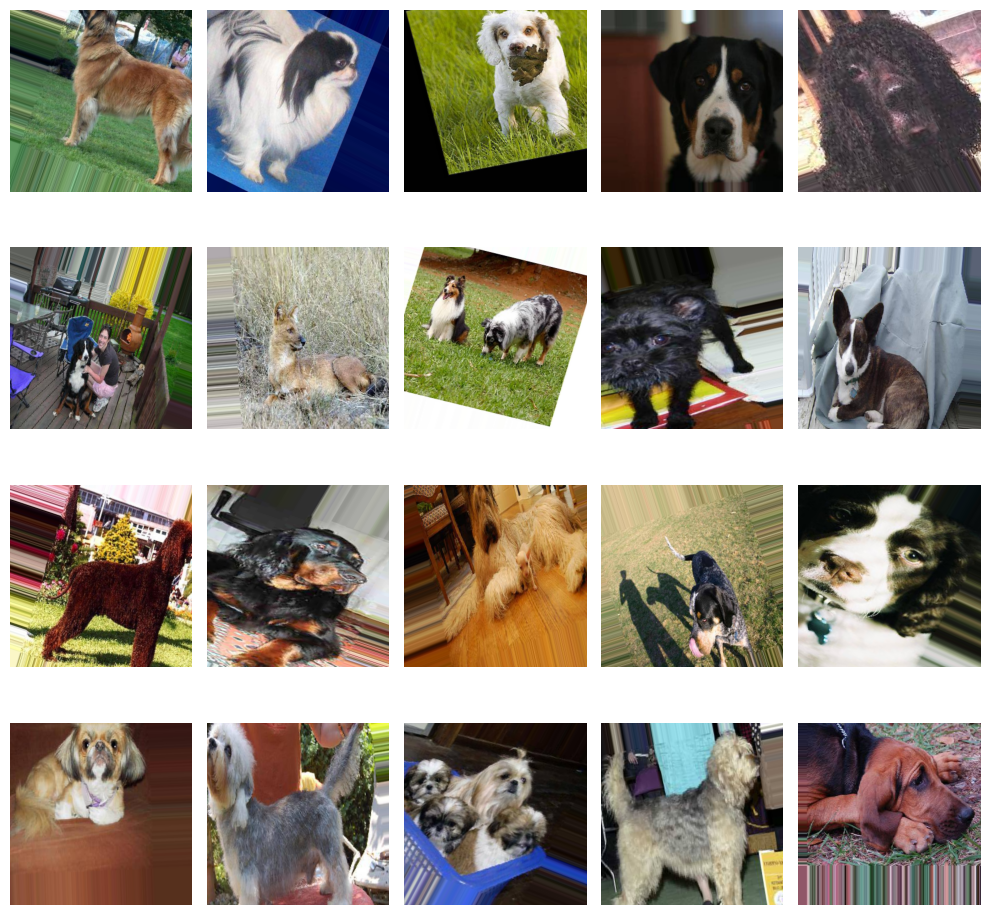

In [31]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)
augmented_images = train_datagen.flow(X_train, y=y_train, shuffle=True)
plt.figure(figsize=(10, 10))
for i in range(20):
    augmented_image = augmented_images.next()[0][0] 
    plt.subplot(4, 5, i + 1)
    plt.imshow(augmented_image)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [33]:
#  Hyper-parameter
batch_size= 128
epochs=25
learn_rate=.001
sgd=SGD(learning_rate=learn_rate, momentum=0.9, nesterov=False)
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;">⚖️Building a Model⚖️</p>

In [34]:
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    
    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [35]:
# InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X_train)

print('Inception feature maps shape', inception_features.shape)

224/224 [==============================] - 31s 134ms/step
Feature maps shape:  (7155, 2048)
Inception feature maps shape (7155, 2048)


del X, X_train 
gc.collect()

In [36]:
model = Sequential()
# model.add(Dense(1028,input_shape=(final_features.shape[1],)))
model.add(Dropout(0.7,input_shape=(inception_features.shape[1],)))
model.add(Dense(n_classes,activation= 'softmax'))

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the model. 
history = model.fit(inception_features, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr, EarlyStop])

Epoch 1/25
45/45 [==============================] - 1s 7ms/step - loss: 3.5759 - accuracy: 0.3115 - val_loss: 1.8875 - val_accuracy: 0.8477 - lr: 0.0010
Epoch 2/25
45/45 [==============================] - 0s 4ms/step - loss: 1.3637 - accuracy: 0.7942 - val_loss: 0.7680 - val_accuracy: 0.8833 - lr: 0.0010
Epoch 3/25
45/45 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.8677 - val_loss: 0.5001 - val_accuracy: 0.9092 - lr: 0.0010
Epoch 4/25
45/45 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.8950 - val_loss: 0.4158 - val_accuracy: 0.9099 - lr: 0.0010
Epoch 5/25
45/45 [==============================] - 0s 5ms/step - loss: 0.4139 - accuracy: 0.9037 - val_loss: 0.3699 - val_accuracy: 0.9113 - lr: 0.0010
Epoch 6/25
45/45 [==============================] - 0s 4ms/step - loss: 0.3477 - accuracy: 0.9125 - val_loss: 0.3485 - val_accuracy: 0.9078 - lr: 0.0010
Epoch 7/25
45/45 [==============================] - 0s 4ms/step - loss: 0.3079 - a

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 120)               245880    
                                                                 
Total params: 245,880
Trainable params: 245,880
Non-trainable params: 0
_________________________________________________________________


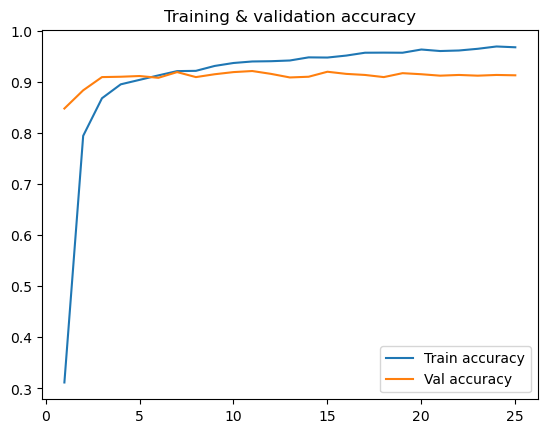

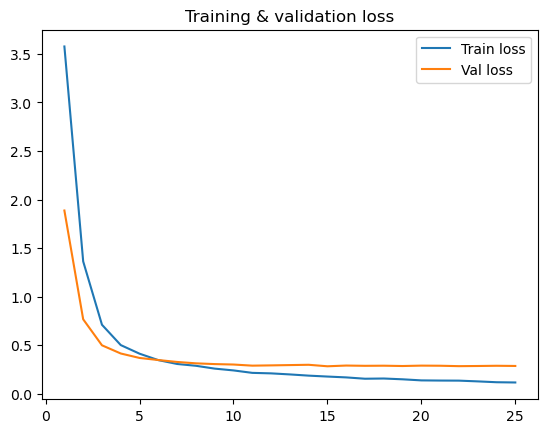

In [38]:
# Plot result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()

del inception_features
gc.collect()

In [39]:
def extact_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    print('Inception feature maps shape', inception_features.shape)
    return inception_features

test_features = extact_features(X_test)

96/96 [==============================] - 15s 140ms/step
Feature maps shape:  (3067, 2048)
Inception feature maps shape (3067, 2048)


In [40]:
y_pred = model.predict(test_features)

96/96 [==============================] - 0s 1ms/step


In [41]:
from sklearn.metrics import accuracy_score

y_test_indices = np.argmax(y_test, axis=1)
y_pred_indices = np.argmax(y_pred, axis=1)

accuracy_score(y_test_indices, y_pred_indices)

0.9106618845777633

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🎲Prediction🎲</p>

In [42]:
predict_df = pd.DataFrame({'Target_Labels': y_test_indices, 'Predictions': y_pred_indices})
predict_df.head(20)

,Target_Labels,Predictions
0,111,111
1,56,56
2,97,97
3,40,40
4,52,52
5,47,47
6,103,103
7,115,115
8,19,19
9,29,29


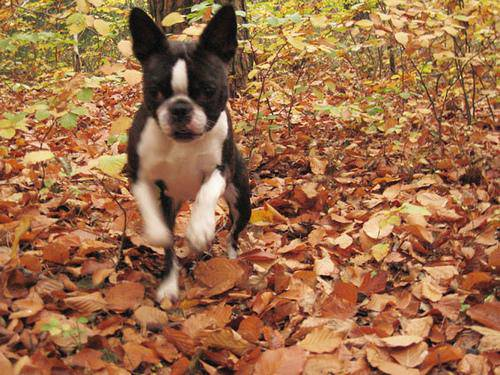

In [43]:
from IPython.display import display,Image
Image("../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [44]:
img_g = load_img("../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg",target_size = img_size)
img_g = np.expand_dims(img_g, axis=0)
test_features = extact_features(img_g)
predg = model.predict(test_features)
print(f"Dog Breed: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 [==============================] - 1s 1s/step
Feature maps shape:  (1, 2048)
Inception feature maps shape (1, 2048)
1/1 [==============================] - 0s 19ms/step
Dog Breed: boston_bull
Probability of prediction): 100 %


# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🧐Hyper-parameter Optimization🔎</p>

In [45]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D, Input, Lambda
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Define the hypermodel building function
def build_hypermodel(hp):
    input_layer = Input(img_size)
    preprocessor = Lambda(inception_preprocessor)(input_layer)
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=img_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)

    model = Sequential()
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.7, step=0.1, default=0.5), input_shape=(avg.shape[1],)))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-6, max_value=1e-3, sampling='LOG', default=1e-4)),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a Keras Tuner RandomSearch tuner
tuner = RandomSearch(
    build_hypermodel,
    objective='val_accuracy',
    max_trials=3,  # You can adjust this based on your resources and time
    directory='my_tuner_dir',
    project_name='inception_tuner'
)

# Perform the hyperparameter search
tuner.search(inception_features, y_train,
             epochs=25,
             validation_split=0.2,
             callbacks=[ReduceLROnPlateau(), EarlyStopping(patience=10)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)

# Build the final model using the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Compile the final model
final_model.compile(
    optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the final model
final_history = final_model.fit(
    inception_features, y_train,
    batch_size=batch_size,
    epochs=25,
    validation_split=0.2,
    callbacks=[ReduceLROnPlateau(), EarlyStopping(patience=10)]
)



Trial 3 Complete [00h 00m 20s]
val_accuracy: 0.8735150098800659

Best val_accuracy So Far: 0.9217330813407898
Total elapsed time: 00h 01m 02s
Best Hyperparameters:
{'dropout': 0.30000000000000004, 'learning_rate': 8.172031900854442e-05}
Epoch 1/25
45/45 [==============================] - 1s 7ms/step - loss: 4.6730 - accuracy: 0.0334 - val_loss: 4.4362 - val_accuracy: 0.1209 - lr: 8.1720e-05
Epoch 2/25
45/45 [==============================] - 0s 5ms/step - loss: 4.2562 - accuracy: 0.1640 - val_loss: 4.0513 - val_accuracy: 0.3655 - lr: 8.1720e-05
Epoch 3/25
45/45 [==============================] - 0s 4ms/step - loss: 3.8690 - accuracy: 0.3574 - val_loss: 3.6845 - val_accuracy: 0.5779 - lr: 8.1720e-05
Epoch 4/25
45/45 [==============================] - 0s 4ms/step - loss: 3.5080 - accuracy: 0.5412 - val_loss: 3.3350 - val_accuracy: 0.6925 - lr: 8.1720e-05
Epoch 5/25
45/45 [==============================] - 0s 4ms/step - loss: 3.1571 - accuracy: 0.6726 - val_loss: 3.0037 - val_accuracy: 0.

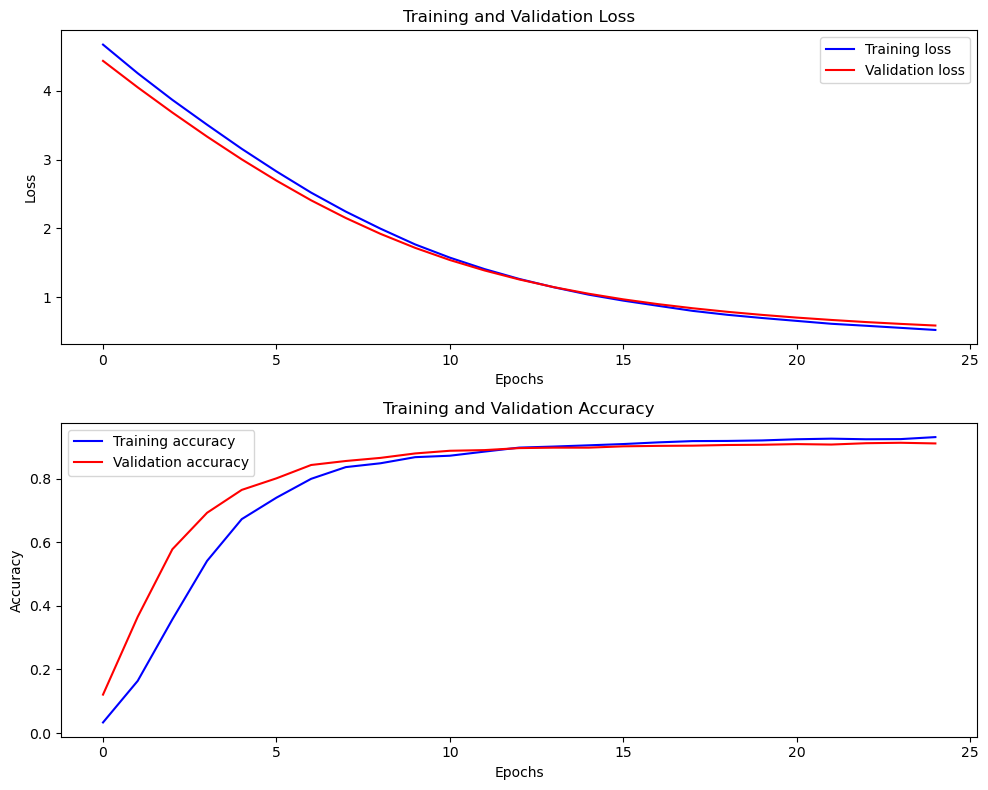

In [48]:
import matplotlib.pyplot as plt

def plot_history(history):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Plot training and validation loss
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
    ax[0].set_title('Training and Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')

    # Plot training and validation accuracy
    ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
    ax[1].set_title('Training and Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')

    plt.tight_layout()
    plt.show()

# Use the plot_history function
plot_history(final_history)
